## House Price Prediction Regression Project

### Project Goal


Predict the price of a house by it's features. If you are a buyer or seller of the house but you don't know the exact price of the house, supervised machine learning regression algorithms can help you to predict the price of the house just providing features of the target house.

### Load Modules / Libraries

In [611]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

### Load Dataset

In [612]:
train_data_path = r'/home/anuuu/Documents/Machine Learning /House_Price_Prediction_model/data/train.csv'
test_data_path = r'/home/anuuu/Documents/Machine Learning /House_Price_Prediction_model/data/test.csv'

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print('Shape of df_train: ', df_train.shape)
print('Shape of df_test: ', df_test.shape)

Shape of df_train:  (1460, 81)
Shape of df_test:  (1459, 80)


In [613]:
pd.set_option('display.max_columns', None)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Know Your Data

<b>Will use these features while converting into numerical format / Encoding:</b>

OverallQual,
OverallCond,
YearBuilt, 
YearRemodAdd,
HouseStyle,
MSSubClass,
TotalBsmtSF,
GrLivArea,
GarageCars,
GarageArea,
Fireplaces,
FireplaceQu,
Neighborhood,
Condition1,
Condition2,
LotArea,
LotFrontage,
LotShape,
LandContour,
MSZoning,
ExterQual,
ExterCond,
KitchenQual,
BsmtQual,
BsmtCond,
CentralAir,
PoolArea,
PoolQC,
WoodDeckSF,
OpenPorchSF,
MoSold,
YrSold,
SaleCondition

### Data Integration

In [614]:
df = pd.concat([df_train, df_test])

print('Shape of integrated Data/DF: ', df.shape)

df.tail(5)

Shape of integrated Data/DF:  (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


### Get the Brief Information of Dataset

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

### Features with most null values

Alley, PoolQC, Fence, MiscFeature, FireplaceQu, MasVnrType

In [616]:
int_features = df.select_dtypes(include=['int64']).columns
print('Total number of integer features: ', int_features.shape[0])

print('Integer features name: ', int_features.tolist())

Total number of integer features:  26
Integer features name:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [617]:
float_features = df.select_dtypes(include=['float64']).columns
print('Total number of integer features: ', float_features.shape[0])

print('Integer features name: ', float_features.tolist())

Total number of integer features:  12
Integer features name:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [618]:
categ_features = df.select_dtypes(include=['object']).columns
print('Total number of integer features: ', categ_features.shape[0])

print('Integer features name: ', categ_features.tolist())

Total number of integer features:  43
Integer features name:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Get the Statistical Information of Numerical Features



In [619]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [620]:
df.describe().shape

(8, 38)

In [621]:
df['MSSubClass']

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
30       70
31       20
32       20
33       20
34      120
35       60
36       20
37       20
38       20
39       90
40       20
41       20
42       85
43       20
44       20
45      120
46       50
47       20
48      190
49       20
50       60
51       50
52       90
53       20
54       80
55       20
56      160
57       60
58       60
59       20
60       20
61       75
62      120
63       70
64       60
65       60
66       20
67       20
68       30
69       50
70       20
71       20
72       60
73       20
74       50
75      180
76       20
77       50
78       90
79       50
80       60
81      120
82       20
83  

### Handling Missing Value

<b>Visualise null/Missing value

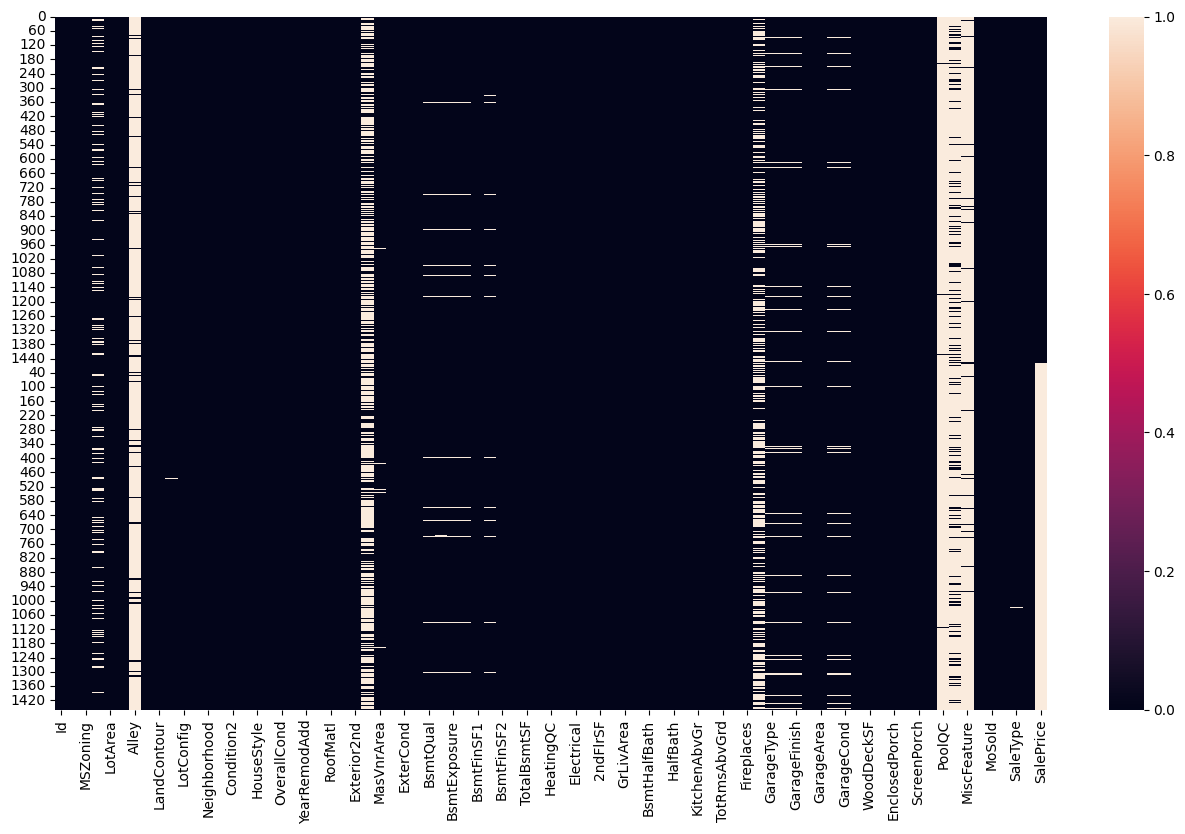

In [622]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.isnull())
plt.savefig('EDA_img/heatmap_DF_of_null_values.png')

### Get the null value percentage for every feature

In [623]:
# Set index as ID column

df = df.set_index("Id")

In [624]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [625]:
null_percent = null_count/df.shape[0] * 100
pd.set_option('display.max_rows', None)  
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

### Drop Columns/Features

In [626]:
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [627]:
df['Alley'].value_counts()


Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [628]:
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [629]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [630]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [631]:
df['LotFrontage'].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

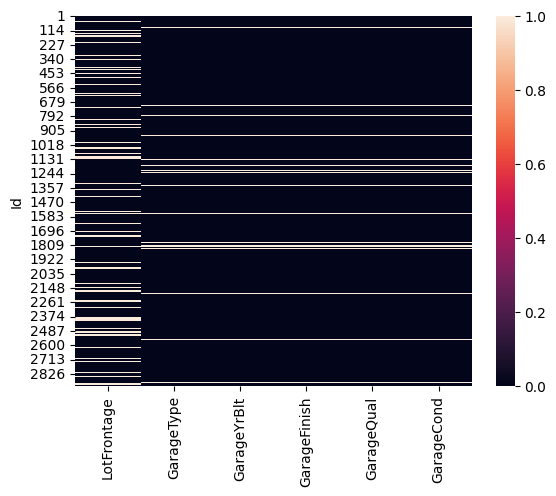

In [632]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

As per the observation, no feature is being dropped.

### Missing Value Imputation 

In [633]:
missing_value_features = null_percent[null_percent > 0]
print('Total missing value features: ', len(missing_value_features))

Total missing value features:  35


In [634]:
missing_value_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [635]:
cat_missing_value_features = missing_value_features[missing_value_features.keys().isin(categ_features)]
print('Total number of categorical missing features: ', len(cat_missing_value_features))

Total number of categorical missing features:  23


In [636]:
cat_missing_value_features

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [637]:
int_missing_value_features = missing_value_features[missing_value_features.keys().isin(int_features)]
print('Total number of integer missing features: ', len(int_missing_value_features))

Total number of integer missing features:  0


In [638]:
float_missing_value_features = missing_value_features[missing_value_features.keys().isin(float_features)]
print('Total number of float missing features: ', len(float_missing_value_features))

Total number of float missing features:  12


In [639]:
float_missing_value_features

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [640]:
# Handling MSZoning = 0.137033
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [641]:
def oldNewHistPlot(df, df_new, feature):
    plt.subplot(121)
    sns.histplot(df[feature])
    plt.title('Old Data Distribution')
    plt.subplot(122)
    sns.histplot(df_new[feature])
    plt.title('New Data Distribution')

<Axes: xlabel='MSZoning', ylabel='Count'>

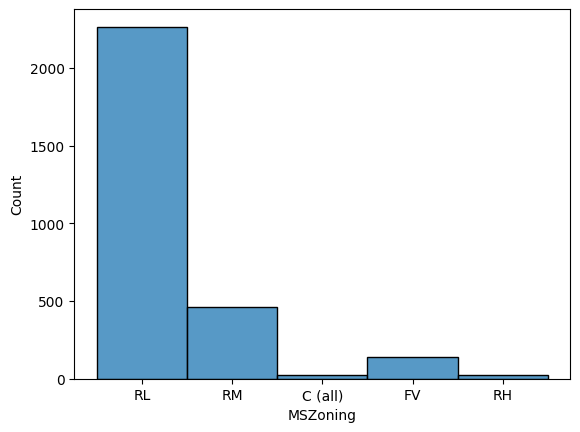

In [642]:
sns.histplot(df['MSZoning'])

In [643]:
# backup of original data
df_mvi = df.copy()
df_mvi.shape 

(2919, 80)

In [644]:
msZoning_mode = df_mvi['MSZoning'].mode()[0]
df_mvi.replace({'MSZoning': {np.nan: msZoning_mode}}, inplace=True)
df_mvi['MSZoning'].isnull().sum()

np.int64(0)

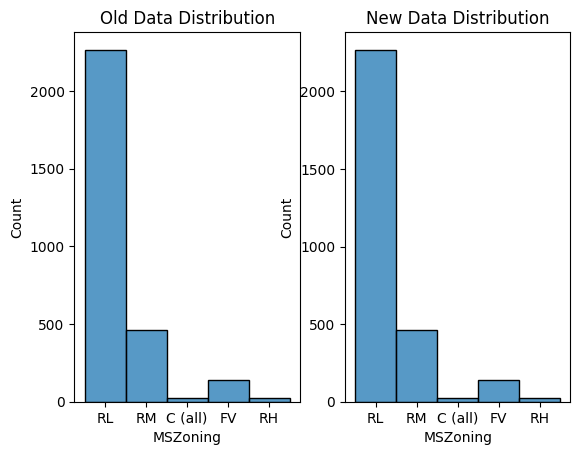

In [645]:
oldNewHistPlot(df, df_mvi, 'MSZoning')

In [646]:
# Handling Alley = 93.216855
df_mvi['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [647]:
alley_const = 'NA'
df_mvi.replace({'Alley': {np.nan: alley_const}}, inplace= True)
df_mvi['Alley'].isnull().sum()

np.int64(0)

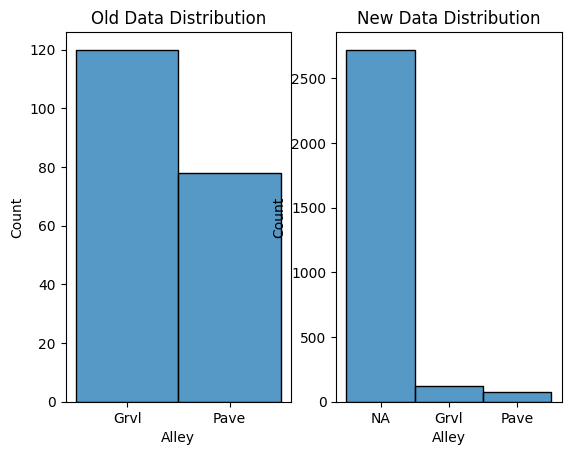

In [648]:
oldNewHistPlot(df, df_mvi, 'Alley')

In [649]:
# Handling LotFrontage = 16.649538

def boxHistPlot(df, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.histplot(df)

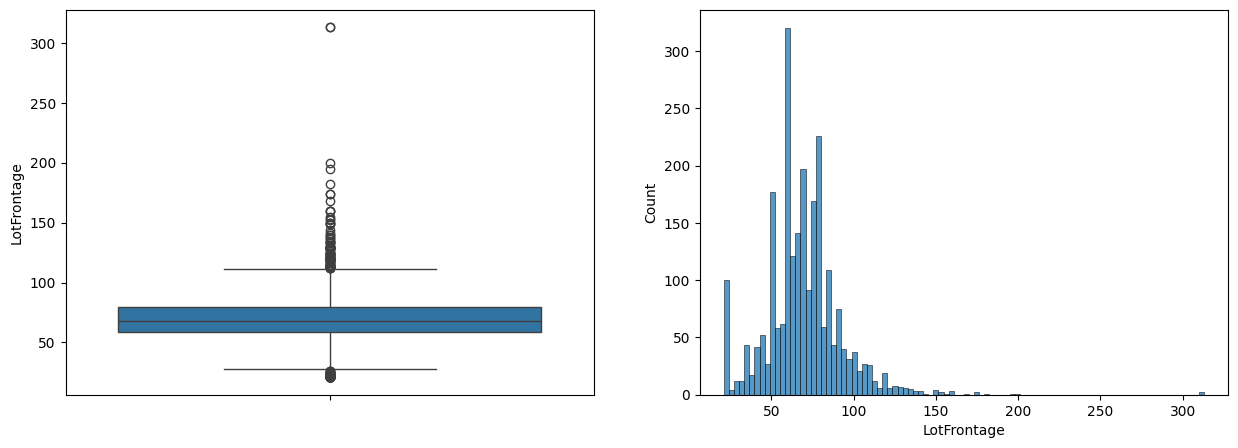

In [650]:
boxHistPlot(df['LotFrontage'])

In [651]:
lotfrontange_mean = df['LotFrontage'].mean()
df_mvi.replace({'LotFrontage': {np.nan: lotfrontange_mean}}, inplace=True)
df_mvi['LotFrontage'].isnull().sum()

np.int64(0)

In [652]:
def oldNewBoxHistPlot(df, df_new, feature, figsize=(16, 10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title('Old Data Distribution')
    plt.subplot(222)
    sns.histplot(df[feature])
    plt.title('Old Data Distribution')

    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title('New Data Distribution')
    plt.subplot(224)
    sns.histplot(df_new[feature])
    plt.title('New Data Distribution')

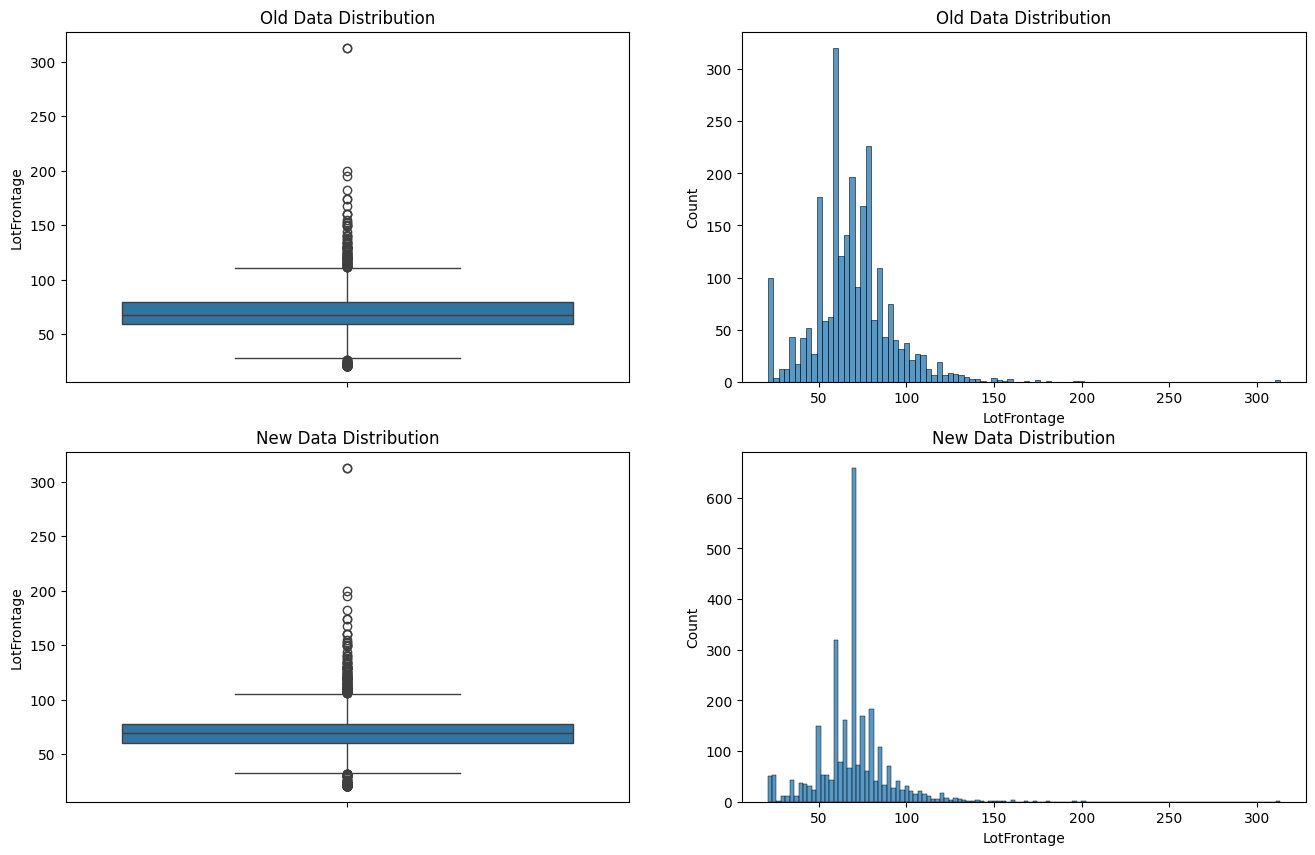

In [653]:
oldNewBoxHistPlot(df, df_mvi, 'LotFrontage')

In [654]:
# Handling Utilities

df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [655]:
utilities_mode = df['Utilities'].mode()[0]
df_mvi.replace({'Utilities': {np.nan: utilities_mode}}, inplace=True)
print(df_mvi['Utilities'].isnull().sum())

0


In [656]:
# Handling Exterior1st and Exterior2nd

exterior1st_mode = df['Exterior1st'].mode()[0]
exterior2nd_mode = df['Exterior2nd'].mode()[0]

df_mvi.replace({'Exterior1st': {np.nan: exterior1st_mode}}, inplace=True)
df_mvi.replace({'Exterior2nd': {np.nan: exterior2nd_mode}}, inplace=True)

print('Exterior1st: ', df_mvi['Exterior1st'].isnull().sum())
print('Exterior2nd: ', df_mvi['Exterior2nd'].isnull().sum())

Exterior1st:  0
Exterior2nd:  0


In [657]:
# Handling MasVnrType, MasVnrArea

df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [658]:
masVnrType_const = 'None'
df_mvi.replace({'MasVnrType': {np.nan: masVnrType_const}}, inplace= True)
print(df_mvi['MasVnrType'].isnull().sum())

0


In [659]:
masVnrArea_const = 0
df_mvi.replace({'MasVnrArea': {np.nan: masVnrArea_const}}, inplace= True)
print(df_mvi['MasVnrArea'].isnull().sum())

0


In [660]:
# Handling Bsmt Features: 

# Categorical: 
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

cat_bsmt_feat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Numerical:  
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath 

num_bsmt_feat = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
     

<Axes: ylabel='Id'>

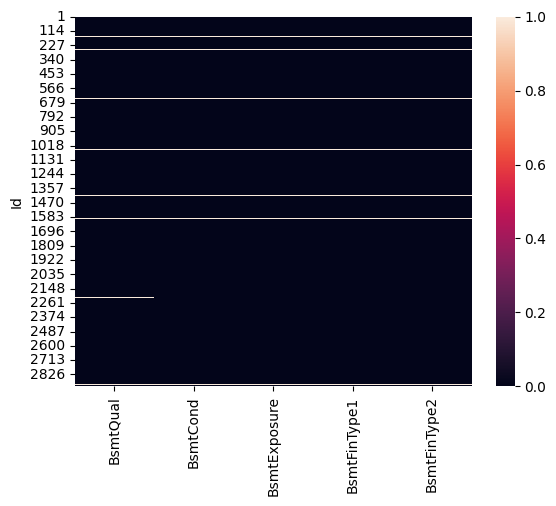

In [661]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [662]:
for feat in cat_bsmt_feat:
    print(f'Value count of {feat}: {df[feat].value_counts()}')

Value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [663]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [664]:
bsmt_cont = 'NA'
for feat in cat_bsmt_feat:
    df_mvi.replace({feat: {np.nan: bsmt_cont}}, inplace=True)

In [665]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

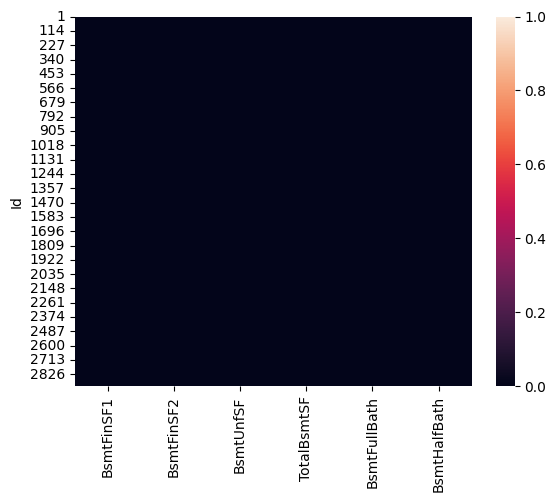

In [666]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [667]:
bsmt_num = 'NA'
for feat in num_bsmt_feat:
    df_mvi.replace({feat: {np.nan: bsmt_num}}, inplace=True)

In [668]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [669]:
# Handling Electrical and KitchenQual

df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [670]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [671]:
df_elec_kitch = df[['Electrical', 'KitchenQual', 'KitchenAbvGr']]
df_elec_kitch[df_elec_kitch.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [672]:
electrical_mode = df['Electrical'].mode()[0]
kitchenQual_mode = df['KitchenQual'].mode()[0]

df_mvi.replace({'Electrical': {np.nan: electrical_mode}}, inplace=True)
df_mvi.replace({'KitchenQual': {np.nan: kitchenQual_mode}}, inplace=True)

In [673]:
print(f'Electrical Null values: {df_mvi['Electrical'].isnull().sum()}')
print(f'KitchenQual Null values: {df_mvi['KitchenQual'].isnull().sum()}')

Electrical Null values: 0
KitchenQual Null values: 0


In [674]:
# Handling Functional

functional_const = 'Typ'
df_mvi.replace({'Functional': {np.nan: functional_const}}, inplace=True)

print(df_mvi['Functional'].isnull().sum())

0


In [675]:
# Handling FireplaceQu, PoolQC, Fence, MiscFeature

other_categorical_features = ['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

for feat in other_categorical_features:
    feat_const = 'NA'
    df_mvi.replace({feat : {np.nan: feat_const}}, inplace=True)
    print(f'{feat} : {df_mvi[feat].isnull().sum()}')

FireplaceQu : 0
PoolQC : 0
Fence : 0
MiscFeature : 0


In [676]:
#Handling Garage features:

#Categorical

categ_garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

#Numerical

num_garage_features = ['GarageYrBlt', 'GarageCars', 'GarageArea']

for feat in categ_garage_features:
    feat_const = 'NA'
    df_mvi.replace({feat : {np.nan: feat_const}}, inplace=True)
    print(f'{feat} : {df_mvi[feat].isnull().sum()}')

for feat in num_garage_features:
    feat_const = 0
    df_mvi.replace({feat : {np.nan: feat_const}}, inplace=True)
    print(f'{feat} : {df_mvi[feat].isnull().sum()}')

GarageType : 0
GarageFinish : 0
GarageQual : 0
GarageCond : 0
GarageYrBlt : 0
GarageCars : 0
GarageArea : 0


In [677]:
# df_garage = df[num_garage_features + categ_garage_features]
# df_garage[df_garage.isnull().any(axis=1)]

In [678]:
# Handling SaleType
df['SaleType'].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [679]:
saleType_mode = df['SaleType'].mode()[0]

df_mvi.replace({'SaleType' : { np.nan: saleType_mode}}, inplace=True)
print(df_mvi['SaleType'].isnull().sum())

0


### Feature Transformation

Converting Numerical Feature to Categorical Feature

In [680]:
feat_for_num_conv = ['MSSubClass', 'YearBuilt', 'GarageYrBlt', 'MoSold', 'YrSold']

for feat in feat_for_num_conv: 
    print(f'{feat}: dataType: {df_mvi[feat].dtype}')

MSSubClass: dataType: int64
YearBuilt: dataType: int64
GarageYrBlt: dataType: float64
MoSold: dataType: int64
YrSold: dataType: int64


In [681]:
df_mvi[feat_for_num_conv].head()

,MSSubClass,YearBuilt,GarageYrBlt,MoSold,YrSold
Id,,,,,
1,60,2003,2003.0,2,2008
2,20,1976,1976.0,5,2007
3,60,2001,2001.0,9,2008
4,70,1915,1998.0,2,2006
5,60,2000,2000.0,12,2008


In [682]:
df_mvi['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [683]:
# Changing the months in number to corresponding month names
df_mvi['MoSold'] = df_mvi['MoSold'].apply(lambda x : calendar.month_abbr[x])
df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [684]:
for feat in feat_for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

Converting Categorical Features to Numerical Features

<b> Ordinal Encoding

In [685]:
ordinal_end_var = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                   'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Functional',
                   'GarageFinish', 'PavedDrive', 'Utilities']

print('Total Number of features to convert ordinal numerical format: ', len(ordinal_end_var))

Total Number of features to convert ordinal numerical format:  17


In [686]:
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['ExterQual'].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [687]:
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['BsmtExposure'] = df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No', 'Mn', 'Av', 'Gd'], ordered=True )).cat.codes
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True )).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True )).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True )).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered=True )).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf', 'RFn', 'Fin'], ordered=True )).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered=True )).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], ordered=True )).cat.codes

In [688]:
for feat in ordinal_end_var:
    print(df_mvi[feat].value_counts())

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64
ExterCond
2    2538
3     299
1      67
4      12
0       3
Name: count, dtype: int64
BsmtQual
3    1283
4    1209
5     258
2      88
0      81
Name: count, dtype: int64
BsmtCond
3    2606
4     122
2     104
0      82
1       5
Name: count, dtype: int64
BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64
BsmtFinType1
1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: count, dtype: int64
BsmtFinType2
1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: count, dtype: int64
HeatingQC
4    1493
2     857
3     474
1      92
0       3
Name: count, dtype: int64
KitchenQual
2    1493
3    1151
4     205
1      70
Name: count, dtype: int64
FireplaceQu
0    1420
4     744
3     592
2      74
1      46
5      43
Name: count, dtype: int64
GarageQual
3    2604
0     159
2     124
4      24
1       5
5       3
Name: count, dtype: int64
GarageCon

In [689]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

### One Hot Encoding for Nominal Categorical Data

In [690]:
df_encode = df_mvi.copy()

df_encode['BsmtFinSF1'] = pd.to_numeric(df['BsmtFinSF1'], errors='coerce').fillna(0)
df_encode['BsmtFinSF2'] = pd.to_numeric(df['BsmtFinSF2'], errors='coerce').fillna(0)
df_encode['BsmtUnfSF'] = pd.to_numeric(df['BsmtUnfSF'], errors='coerce').fillna(0)
df_encode['TotalBsmtSF'] = pd.to_numeric(df['TotalBsmtSF'], errors='coerce').fillna(0)
df_encode['BsmtHalfBath'] = pd.to_numeric(df['BsmtHalfBath'], errors='coerce').fillna(0)
df_encode['BsmtFullBath'] = pd.to_numeric(df['BsmtFullBath'], errors='coerce').fillna(0)

In [691]:

object_features = df_encode.select_dtypes(include='object').columns.tolist()
print('Total object data type features: ', len(object_features))

print('Features: \n', object_features)

Total object data type features:  31
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [692]:
df_encode[object_features].head(5)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2001.0,NA,NA,Sep,2008,WD,Normal
4,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,1998.0,NA,NA,Feb,2006,WD,Abnorml
5,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2000.0,NA,NA,Dec,2008,WD,Normal


In [693]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [694]:
print('Shape of the data before encoding: ', df_encode.shape)
df_encode = pd.get_dummies(df_encode,
                        columns=object_features, 
                        prefix=object_features, 
                        drop_first=True)
print('Shape of the data before encoding: ', df_encode.shape)

Shape of the data before encoding:  (2919, 80)
Shape of the data before encoding:  (2919, 454)


### Split Data For Training & Testing

In [695]:
df_encode.shape

(2919, 454)

In [696]:
len_train = df_train.shape[0]

In [720]:
X_train = df_encode[:len_train].drop('SalePrice', axis=1)
y_train = df_encode['SalePrice'][:len_train]

X_test = df_encode[len_train:].drop('SalePrice', axis=1)

print('Shape of x_train data: ', X_train.shape)
print('Shape of y_train data: ', y_train.shape)
print('Shape of x_test data: ', X_test.shape)

Shape of x_train data:  (1460, 453)
Shape of y_train data:  (1460,)
Shape of x_test data:  (1459, 453)


### Feature Scaling

In [698]:
sc = StandardScaler()

sc.fit(X_train)
# Formula: z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [699]:
print('x_train',X_train[:3,:])
print('x_test', X_test[:3,:])

x_train [[-0.22335706 -0.20714171  0.02618016 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.45789401 -0.09188637  0.02618016 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.08710685  0.07347998  0.02618016 ... -0.11785113  0.4676514
  -0.30599503]]
x_test [[ 0.45789401  0.11076257  0.02618016 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.50331075  0.37584985  0.02618016 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.18539358  0.33205282  0.02618016 ... -0.11785113  0.4676514
  -0.30599503]]


In [700]:
### Carry Forward for deployment

# sc.mean_
# sc.n_features_in_
# sc.scale_
# sc.with_mean
# sc.with_std
# sc.n_samples_seen_
# sc.var_

### Train ML Model

In [701]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [702]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor


In [703]:
svr = SVR()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()

gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgb = XGBRegressor()


In [704]:
models = {'a': ['SVR', svr],
          'b': ['KNeighborsRegressor', knr],
          'c': ['GaussianProcessRegressor', gpr],
          'd': ['DecisionTreeRegressor', dtr],
          'e': ['GradientBoostingRegressor', gbr],
          'f': ['RandomForestRegressor', rfr], 
          'g': ['XGBRegressor', xgb]        
          }

In [712]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    
    mean_score = r2_val_score.mean()
    std_score = r2_val_score.std()
    
    return mean_score, std_score


In [713]:
models_score = []

for model in models:
    print('Training model :', models[model][0])
    mean_score, std_score = test_model(models[model][1], X_train, y_train)
    print(f"Score of model: Mean R² = {mean_score}, Std = {std_score}")
    models_score.append([models[model][0], mean_score, std_score])

Training model : SVR
Score of model: Mean R² = -0.05210740839596644, Std = 0.014446197935496556
Training model : KNeighborsRegressor
Score of model: Mean R² = 0.5600736337050114, Std = 0.05927140839833433
Training model : GaussianProcessRegressor
Score of model: Mean R² = -5.395180747970351, Std = 0.9983860506135502
Training model : DecisionTreeRegressor
Score of model: Mean R² = 0.6894035060663045, Std = 0.178008529435048
Training model : GradientBoostingRegressor
Score of model: Mean R² = 0.8700506882615576, Std = 0.06680390485280727
Training model : RandomForestRegressor
Score of model: Mean R² = 0.8449716143786601, Std = 0.06384237819198368
Training model : XGBRegressor
Score of model: Mean R² = 0.8668602896721312, Std = 0.05590934800786852


In [714]:
models_score_df = pd.DataFrame(models_score, columns=['Model', 'Mean R²', 'Std Dev R²'])

# Sort models by R² score (highest first)
sorted_models_score_df = models_score_df.sort_values(by='Mean R²', ascending=False)
print(sorted_models_score_df)

                       Model   Mean R²  Std Dev R²
4  GradientBoostingRegressor  0.870051    0.066804
6               XGBRegressor  0.866860    0.055909
5      RandomForestRegressor  0.844972    0.063842
3      DecisionTreeRegressor  0.689404    0.178009
1        KNeighborsRegressor  0.560074    0.059271
0                        SVR -0.052107    0.014446
2   GaussianProcessRegressor -5.395181    0.998386


## Model:  GradientBoostingRegressor

### Hyperparameter Tuning

In [715]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the model
model = GradientBoostingRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R² score: {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best R² score: 0.8980565073168119


In [717]:
# Retrain the best model on the full training data
best_model = grid_search.best_estimator_

# Fit the model on the full training data
best_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=300)

In [726]:
# Predict on test data
predictions = best_model.predict(X_train)

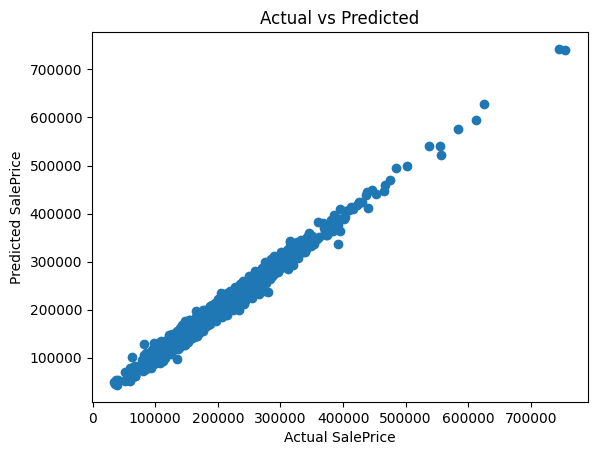

In [727]:
# Plot actual vs predicted values
plt.scatter(y_train, predictions)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted')
plt.show()